# Data cleaning and preprocessing

Todo List

scale amount column


In [7]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

In [14]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("../data/row/creditcard.csv")

In [15]:
data = df.copy()


In [16]:
data['Amount'] = RobustScaler().fit_transform(data['Amount'].to_numpy().reshape(-1,1))

<AxesSubplot:>

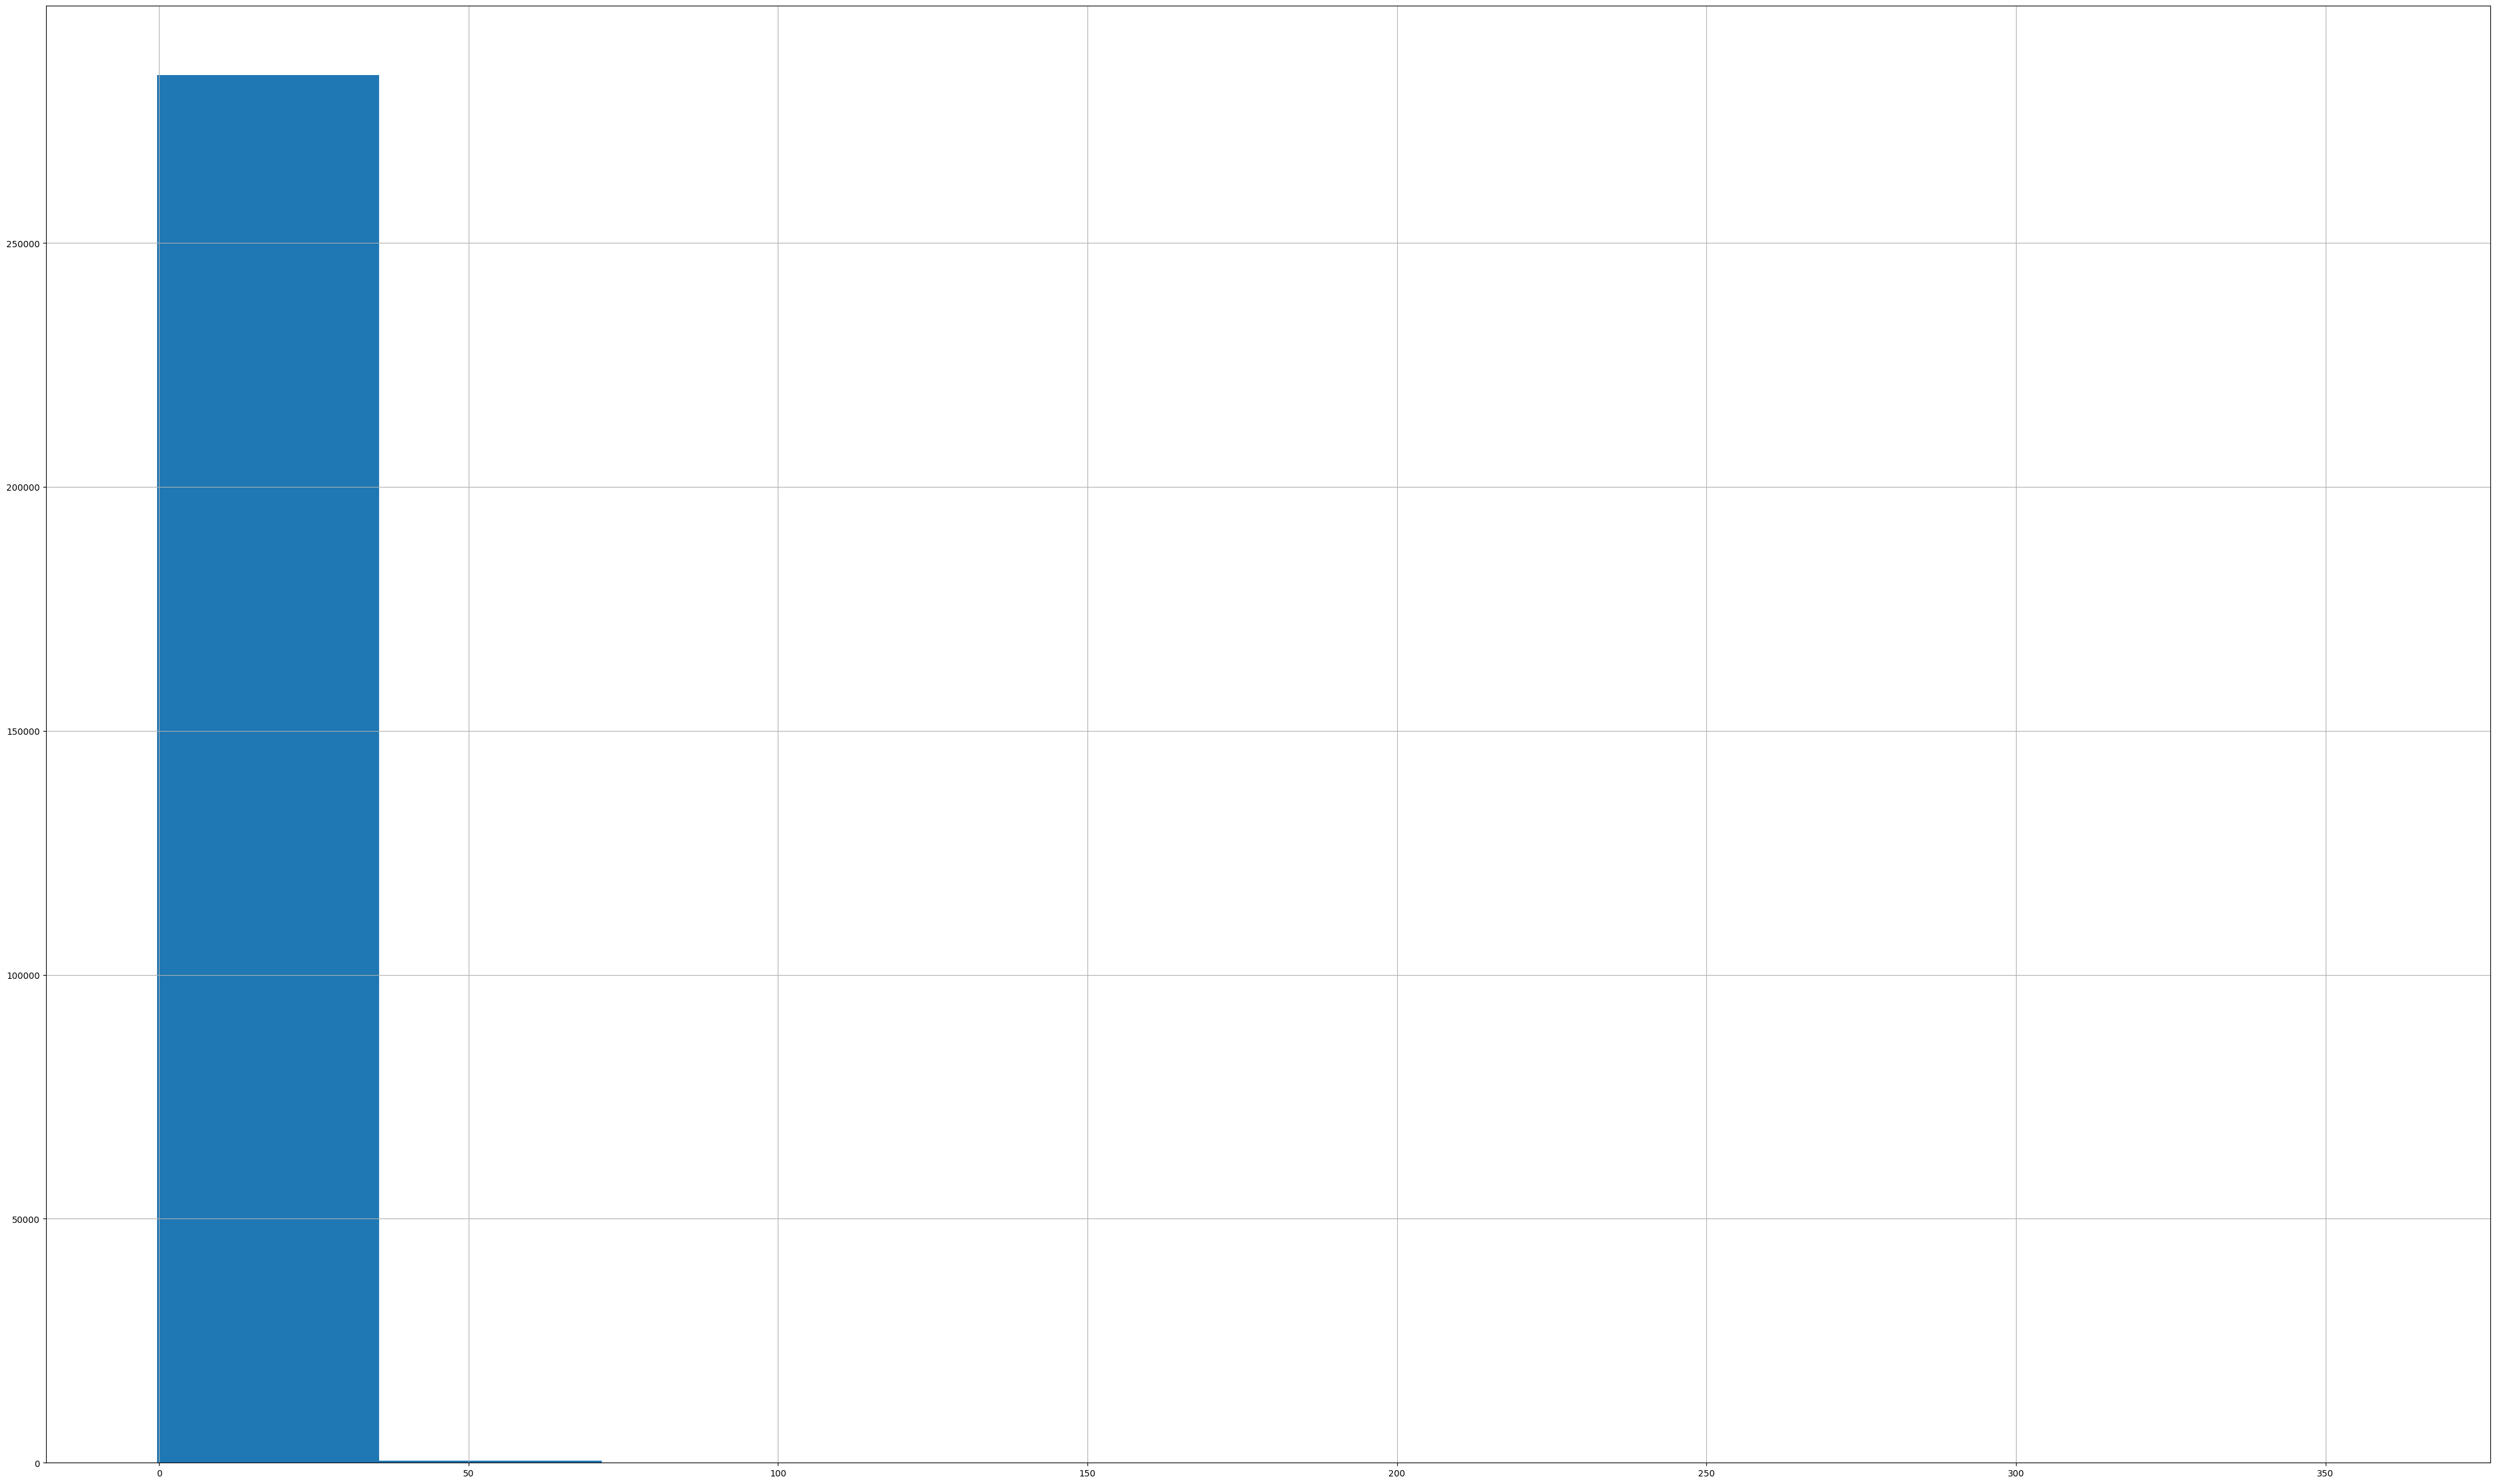

In [21]:
data['Amount'].hist(figsize=(50,30))

In [18]:
data["Amount"].describe()

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

In [22]:
time = data['Time']
data['Time'] = (time - time.min())/ (time.max() - time.min())
data['Time'].describe()

count    284807.000000
mean          0.548717
std           0.274828
min           0.000000
25%           0.313681
50%           0.490138
75%           0.806290
max           1.000000
Name: Time, dtype: float64

In [24]:
data.to_csv("../data/processed/standardized_creditcard.csv")